<center>Notebook - 003 </center>

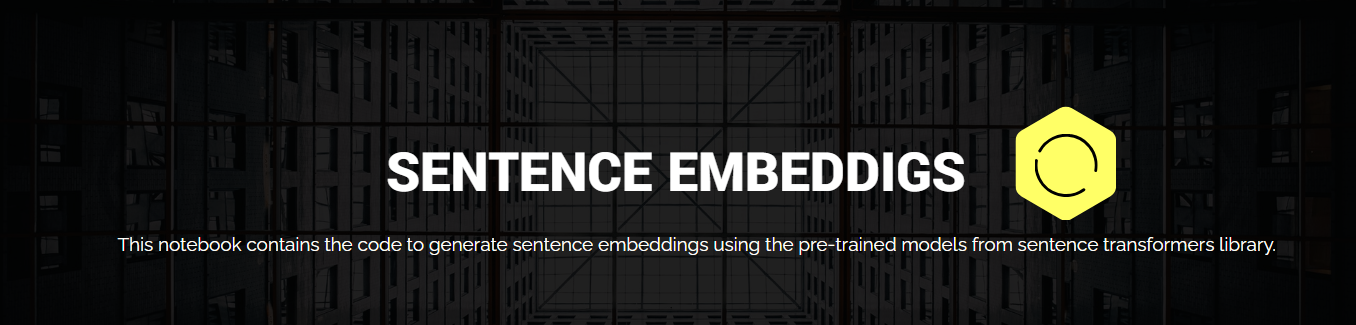

##### Link : [sentence-transformers](https://www.sbert.net/index.html) library.

!pip install sentence_transformers

## IMPORT LIBRARIES

In [31]:
import pandas as pd
from pathlib import Path

from sentence_transformers import SentenceTransformer

## LOAD THE DATA

In [32]:
PATH_DATA_BASE = Path.cwd().parent / "data"
PATH_SENTENCES = Path.cwd().parent / "models/sentences"
PATH_EMBEDDINGS = Path.cwd().parent / "models/embeddings"

In [33]:
# Setting pandas option to display the full content of DataFrame columns without truncation
pd.set_option('display.max_colwidth', None)

In [34]:
import pandas as pd
dataset = pd.read_csv(PATH_DATA_BASE / 'Filtered_arxiv_papers.csv')
dataset.head()

titles  \
0                                 Multispectral Image Segmentation in Agriculture: A Comprehensive Study on Fusion Approaches   
1  Investigating and Improving Latent Density Segmentation Models for Aleatoric Uncertainty Quantification in Medical Imaging   
2                                              DiffPose: SpatioTemporal Diffusion Model for Video-Based Human Pose Estimation   
3                               Domain Adaptation for Medical Image Segmentation using Transformation-Invariant Self-Training   
4                          3D Medical Image Segmentation with Sparse Annotation via Cross-Teaching between 3D and 2D Networks   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        abstracts  \
0                                                                                                                  Multispectral imagery is frequently incorporated into agricultural tasks,\nproviding valuable support for applications such as image segmentation, crop\nmonitoring, field robotics, and yield estimation. From an image segmentation\nperspective, multispectral cameras can provide rich spectral information,\nhelping with noise reduction and feature extraction. As such, this paper\nconcentrates on the use of fusion approaches to enhance the segmentation\nprocess in agricultural applications. More specifically, in this work, we\ncompare different fusion approaches by combining RGB and NDVI as inputs for\ncrop row detection, which can be useful in autonomous robots operating in the\nfield. The inputs are used individually as well as combined at different times\nof the process (early and late fusion) to perform classical and DL-based\nsemantic segmentation. In this study, two agriculture-related datasets are\nsubjected to analysis using both deep learning (DL)-based and classical\nsegmentation methodologies. The experiments reveal that classical segmentation\nmethods, utilizing techniques such as edge detection and thresholding, can\neffectively compete with DL-based algorithms, particularly in tasks requiring\nprecise foreground-background separation. This suggests that traditional\nmethods retain their efficacy in certain specialized applications within the\nagricultural domain. Moreover, among the fusion strategie

In [35]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87422 entries, 0 to 87421
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   titles     87422 non-null  object
 1   abstracts  87422 non-null  object
 2   terms      87422 non-null  object
 3   urls       87422 non-null  object
 4   ids        87422 non-null  object
dtypes: object(5)
memory usage: 3.3+ MB


<CENTER><H2><B>Sentence-Transformers Models</B></H2></CENTER>

<h3>What is a sentence-transformers model?</h3>
    <h4> - It maps sentences & paragraphs to a N dimensional dense vector space and can be used for tasks like clustering or semantic search.</h4>


### After comparing the all above models I have choosed the `all-MiniLM-L6-v2` Model .

- MiniLM is a smaller variant of the BERT model which has been designed to provide high-quality language understanding capabilities while being significantly smaller and more efficient. The "all-MiniLM-L6-v2" model refers to a specific configuration of the MiniLM model.
---esources

#### Here are some reasons why I have chosen this model for my project:
---
1. Efficiency:
   - MiniLM models are smaller and faster than full-size BERT models, which can be a major advantage if you're working on a project with limited computational resources or if you need to process large amounts of data quickly.
---
2. Performance:
   - Despite their smaller size, MiniLM models often perform at a comparable level to full-size BERT models on a variety of NLP tasks.
   - This means that you can often use a MiniLM model without sacrificing much in the way of performance.
   - In fact, the Performance Sentence Embeddings metric which is the average performance on encoding sentences over 14 diverse tasks from different domains is `68.06` for the `all-MiniLM-L6-v2` model, which is very good to start with.
---

3. Ease of Use:
- If you're using a library like Hugging Face's Transformers, it can be relatively straightforward to load a pre-trained MiniLM model and fine-tune it for your specific task.
---
4. Lower Memory Requirements:
   - Given its smaller size, MiniLM requires less memory for training and inference.
   - This could be a crucial factor if you're working with limited hardware resources

### Loading The Pre_trained Models

In [7]:
model = SentenceTransformer('all-MiniLM-L6-v2')

# Our feature we like to encode
sentences = dataset['titles']

# Features are encoded by calling model.encode()
embeddings = model.encode(sentences)

### Print the embeddings

In [8]:
c = 0
for sentence, embedding in zip(sentences, embeddings):

    print("Sentence:", sentence)
    print("Embedding dimension:", len(embedding))
    print("Title length:", len(sentence))
    print("")

    if c >=5:
        break
    c +=1 

Sentence: Multispectral Image Segmentation in Agriculture: A Comprehensive Study on Fusion Approaches
Embedding dimension: 384
Title length: 91

Sentence: Investigating and Improving Latent Density Segmentation Models for Aleatoric Uncertainty Quantification in Medical Imaging
Embedding dimension: 384
Title length: 122

Sentence: DiffPose: SpatioTemporal Diffusion Model for Video-Based Human Pose Estimation
Embedding dimension: 384
Title length: 78

Sentence: Domain Adaptation for Medical Image Segmentation using Transformation-Invariant Self-Training
Embedding dimension: 384
Title length: 93

Sentence: 3D Medical Image Segmentation with Sparse Annotation via Cross-Teaching between 3D and 2D Networks
Embedding dimension: 384
Title length: 98

Sentence: Compete to Win: Enhancing Pseudo Labels for Barely-supervised Medical Image Segmentation
Embedding dimension: 384
Title length: 88



## Save the Model

In [11]:
import pickle

# Saving sentences and corresponding embeddings
with open(PATH_EMBEDDINGS / 'Embeddings.pkl', 'wb') as f:
    pickle.dump(embeddings, f)

with open(PATH_SENTENCES / 'Sentences.pkl', 'wb') as f:
    pickle.dump(sentences, f)

# Testing the embedding model¶

### Test case 1

In [9]:
paper_you_like = input("Enter your topic of interest here 👇 \n")
paper_you_like

Enter your topic of interest here 👇 
 Language Models


'Language Models'

In [10]:
from sentence_transformers import util
cosine_scores = util.cos_sim(embeddings, model.encode(paper_you_like))

In [11]:
import torch
top_similar_papers = torch.topk(cosine_scores,dim=0, k=5,sorted=True)
top_similar_papers

torch.return_types.topk(
values=tensor([[0.8593],
        [0.8410],
        [0.8228],
        [0.8224],
        [0.8127]]),
indices=tensor([[18147],
        [26046],
        [52251],
        [59368],
        [52111]]))

In [12]:
for i in top_similar_papers.indices:
    print(sentences[i.item()])

Large Language Models
An Overview on Language Models: Recent Developments and Outlook
Talking About Large Language Models
Language Modeling at Scale
Eight Things to Know about Large Language Models


In [16]:
output = []
for i in top_similar_papers.indices:
    output.append(sentences[i.item()])

output = []
for i in top_similar_papers.indices:
    output.append(sentences[i.item()])

result = output[0]

embedding1 = model.encode(paper_you_like, convert_to_tensor=True)
embedding2 = model.encode(result , convert_to_tensor=True)

# compute cosine similarity
cosine_scores_1 = util.pytorch_cos_sim(embedding1, embedding2)
print("Cosine similarity:", cosine_scores_1.item())

Cosine similarity: 0.8593489527702332


### Test Case 2

In [13]:
from sentence_transformers import util
import torch
 

paper_you_like2 = input("Enter your topic of interest here 👇 \n")

cosine_scores = util.cos_sim(embeddings, model.encode(paper_you_like2))

top_similar_papers2 = torch.topk(cosine_scores,dim=0, k=5,sorted=True)
print(50*'*')


papers = []
for i in top_similar_papers2.indices:
    print("->" , sentences[i.item()])
    print('')
    papers.append(sentences[i.item()])


embedding01 = model.encode(paper_you_like2, convert_to_tensor=True)
embedding02 = model.encode(papers , convert_to_tensor=True)

# Find the index of the most similar paper
cosine_scores_2 = util.pytorch_cos_sim(embedding01, embedding02)
max_similarity_index = torch.argmax(cosine_scores_2)
print(50*'*')
print("Most similar paper:" , papers[max_similarity_index.item()])

# Get the cosine similarity scores of all papers
cosine_similarity_scores = cosine_scores_2[0].tolist()

# Print the cosine similarity score of the most similar paper
cosine_similarity_score = cosine_similarity_scores[max_similarity_index.item()]
print("Cosine similarity score of the most similar paper:", cosine_similarity_score)

Enter your topic of interest here 👇 
 I want the papers for large language models


**************************************************
-> Talking About Large Language Models

-> Eight Things to Know about Large Language Models

-> Large Language Models

-> Challenges and Applications of Large Language Models

-> A Comprehensive Overview of Large Language Models

**************************************************
Most similar paper: Talking About Large Language Models
Cosine similarity score of the most similar paper: 0.819222092628479


## Testing with general sentences

In [13]:
sentence1 = "Indian will be playing FIFA soon"
sentence2 = "Its raining outside I can't go the market"

# encode sentences to get their embeddings
embedding1 = model.encode(sentence1, convert_to_tensor=True)
embedding2 = model.encode(sentence2, convert_to_tensor=True)

# compute cosine similarity
cosine_scores__1 = util.pytorch_cos_sim(embedding1, embedding2)
print("Cosine similarity:", cosine_scores__1.item())


Cosine similarity: 0.0726933404803276


# Testing the Abstracts

In [ ]:
# Our feature we like to encode
abstract = dataset['abstracts']

# Features are encoded by calling model.encode()
embeddings = model.encode(abstracts)

#### Print the embeddings

In [ ]:

c = 0
for abstract, embedding in zip(abstracts, embeddings):

    print("Sentence:", abstract)
    print("Embedding dimension:", len(embedding))
    print("Title length:", len(abstract))
    print("")

    if c >=3:
        break
    c +=1

#### Test case 1

In [ ]:
from sentence_transformers import util
import torch


paper_you_like2 = input("Enter your topic of interest here 👇 \n")

cosine_scores = util.cos_sim(embeddings, model.encode(paper_you_like2))

top_similar_papers2 = torch.topk(cosine_scores,dim=0, k=5,sorted=True)
print(50*'*')


papers = []
for i in top_similar_papers2.indices:
    print("->" ,abstracts[i.item()])
    print('')
    print(50*'__')
    papers.append(abstracts[i.item()])

result_1 = papers[0]

embedding01 = model.encode(paper_you_like2, convert_to_tensor=True)
embedding02 = model.encode(papers , convert_to_tensor=True)
# compute cosine similarity
cosine_scores_2 = util.pytorch_cos_sim(embedding01, embedding02)
print(50*'*')
print("Cosine similarity:", cosine_scores_2[0])

# Find the index of the most similar paper
max_similarity_index = torch.argmax(cosine_scores_2)

print(50*'*')
print("Most similar paper:")
print(papers[max_similarity_index.item()])

# Get the cosine similarity scores of all papers
cosine_similarity_scores = cosine_scores_2[0].tolist()

# Print the cosine similarity score of the most similar paper
cosine_similarity_score = cosine_similarity_scores[max_similarity_index.item()]
print("Cosine similarity score of the most similar paper:", cosine_similarity_score)

In [19]:
import pandas as pd
from sentence_transformers import SentenceTransformer, util
import torch
import mlflow
import os


paper_you_like2 = "I Want the paper for Topic Modeling With Latent Dirichitley Allocation (LDA)"

cosine_scores = util.cos_sim(embeddings, model.encode(paper_you_like2))

top_similar_papers2 = torch.topk(cosine_scores, dim=0, k=5, sorted=True)

papers = []
for i in top_similar_papers2.indices:
    papers.append(sentences[i.item()])

embedding01 = model.encode(paper_you_like2, convert_to_tensor=True)
embedding02 = model.encode(papers, convert_to_tensor=True)

cosine_scores_2 = util.pytorch_cos_sim(embedding01, embedding02)
max_similarity_index = torch.argmax(cosine_scores_2)

# Start MLflow run and set the experiment
mlflow.set_experiment("Similarity - allMiniLM-l6-v2")  # Set your desired experiment name
with mlflow.start_run() as run:
    # Log parameters and metrics
    mlflow.log_param("input_paper", paper_you_like2)
    mlflow.log_param("num_similar_papers", len(papers))
    mlflow.log_param("most_similar_paper", papers[max_similarity_index.item()])
    mlflow.log_metric("cosine_similarity_score", cosine_scores_2[0, max_similarity_index.item()])

    # Print the results
    print(50 * '*')
    print("Most similar paper:", papers[max_similarity_index.item()])
    print("Cosine similarity score of the most similar paper:", cosine_scores_2[0, max_similarity_index.item()])


Enter your topic of interest here 👇 
 I want the papers for large language models


2023/08/04 11:41:03 INFO mlflow.tracking.fluent: Experiment with name 'Similarity - allMiniLM-l6-v2' does not exist. Creating a new experiment.


**************************************************
Most similar paper: Talking About Large Language Models
Cosine similarity score of the most similar paper: tensor(0.8192)


In [21]:
!mlflow ui

^C


In [24]:
import pandas as pd
from sentence_transformers import SentenceTransformer, util
import torch
import mlflow
import os


paper_you_like2 = "I Want the paper for Topic Modeling With Latent Dirichitley Allocation (LDA)"

cosine_scores = util.cos_sim(embeddings, model.encode(paper_you_like2))

top_similar_papers2 = torch.topk(cosine_scores, dim=0, k=5, sorted=True)

papers = []
for i in top_similar_papers2.indices:
    papers.append(sentences[i.item()])

embedding01 = model.encode(paper_you_like2, convert_to_tensor=True)
embedding02 = model.encode(papers, convert_to_tensor=True)

cosine_scores_2 = util.pytorch_cos_sim(embedding01, embedding02)
max_similarity_index = torch.argmax(cosine_scores_2)

# Start MLflow run and set the experiment
mlflow.set_experiment("Similarity - allMiniLM-l6-v2")  # Set your desired experiment name
with mlflow.start_run() as run:
    # Log parameters and metrics
    mlflow.log_param("input_paper", paper_you_like2)
    mlflow.log_param("num_similar_papers", len(papers))
    mlflow.log_param("most_similar_paper", papers[max_similarity_index.item()])
    mlflow.log_metric("cosine_similarity_score", cosine_scores_2[0, max_similarity_index.item()])

    # Print the results
    print(50 * '*')
    print("Most similar paper:", papers[max_similarity_index.item()])
    print("Cosine similarity score of the most similar paper:", cosine_scores_2[0, max_similarity_index.item()])


Enter your topic of interest here 👇 
 I want the papers for Topic modeling with LDA


**************************************************
Most similar paper: Discriminative Topic Modeling with Logistic LDA
Cosine similarity score of the most similar paper: tensor(0.7014)


In [25]:
!mlflow ui

^C



# all-mpnet-base-v2

In [28]:
import pandas as pd
from sentence_transformers import SentenceTransformer, util
import torch
import mlflow
import os
from sentence_transformers import SentenceTransformer



sentences = dataset['titles']

model = SentenceTransformer('sentence-transformers/all-mpnet-base-v2')
embeddings = model.encode(sentences)


paper_you_like2 = "I Want the paper for Topic Modeling With Latent Dirichitley Allocation (LDA)"

cosine_scores = util.cos_sim(embeddings, model.encode(paper_you_like2))

top_similar_papers2 = torch.topk(cosine_scores, dim=0, k=5, sorted=True)

papers = []
for i in top_similar_papers2.indices:
    papers.append(sentences[i.item()])

embedding01 = model.encode(paper_you_like2, convert_to_tensor=True)
embedding02 = model.encode(papers, convert_to_tensor=True)

cosine_scores_2 = util.pytorch_cos_sim(embedding01, embedding02)
max_similarity_index = torch.argmax(cosine_scores_2)

# Start MLflow run and set the experiment
mlflow.set_experiment("Similarity - all-mpnet-base-v2")  # Set your desired experiment name
with mlflow.start_run() as run:
    # Log parameters and metrics
    mlflow.log_param("input_paper", paper_you_like2)
    mlflow.log_param("num_similar_papers", len(papers))
    mlflow.log_param("most_similar_paper", papers[max_similarity_index.item()])
    mlflow.log_metric("cosine_similarity_score", cosine_scores_2[0, max_similarity_index.item()])

    # Print the results
    print(50 * '*')
    print("Most similar paper:", papers[max_similarity_index.item()])
    print("Cosine similarity score of the most similar paper:", cosine_scores_2[0, max_similarity_index.item()])


2023/08/04 13:46:29 INFO mlflow.tracking.fluent: Experiment with name 'Similarity - all-mpnet-base-v2' does not exist. Creating a new experiment.


**************************************************
Most similar paper: Talking About Large Language Models
Cosine similarity score of the most similar paper: tensor(0.7277)


# all-distilroberta-v1


In [37]:
import pandas as pd
from sentence_transformers import SentenceTransformer, util
import torch
import mlflow
import os
from sentence_transformers import SentenceTransformer

sentences = dataset['titles']

model = SentenceTransformer('all-distilroberta-v1')
embeddings = model.encode(sentences)



**************************************************
Most similar paper: Eight Things to Know about Large Language Models
Cosine similarity score of the most similar paper: tensor(0.6580)


In [ ]:
paper_you_like2 = "I Want the paper for Topic Modeling With Latent Dirichitley Allocation (LDA)"

cosine_scores = util.cos_sim(embeddings, model.encode(paper_you_like2))

top_similar_papers2 = torch.topk(cosine_scores, dim=0, k=5, sorted=True)

papers = []
for i in top_similar_papers2.indices:
    papers.append(sentences[i.item()])

embedding01 = model.encode(paper_you_like2, convert_to_tensor=True)
embedding02 = model.encode(papers, convert_to_tensor=True)

cosine_scores_2 = util.pytorch_cos_sim(embedding01, embedding02)
max_similarity_index = torch.argmax(cosine_scores_2)

model_ = "all-distilroberta-v1"

# Start MLflow run and set the experiment
mlflow.set_experiment("all-distilroberta-v1")  # Set your desired experiment name
with mlflow.start_run() as run:
    # Log parameters and metrics
    mlflow.log_param("input_paper", paper_you_like2)
    mlflow.log_param("Model", model_)
    mlflow.log_param("num_similar_papers", len(papers))
    mlflow.log_param("most_similar_paper", papers[max_similarity_index.item()])
    mlflow.log_metric("cosine_similarity_score", cosine_scores_2[0, max_similarity_index.item()])

    # Print the results
    print(50 * '*')
    print("Most similar paper:", papers[max_similarity_index.item()])
    print("Cosine similarity score of the most similar paper:", cosine_scores_2[0, max_similarity_index.item()])

In [39]:
!mlflow ui

^C


# all-MiniLM-L12-v2

In [42]:
import pandas as pd
from sentence_transformers import SentenceTransformer, util
import torch
import mlflow
import os
from sentence_transformers import SentenceTransformer



sentences = dataset['titles']

model = SentenceTransformer('all-MiniLM-L12-v2')
embeddings = model.encode(sentences)


paper_you_like2 = "I Want the paper for Topic Modeling With Latent Dirichitley Allocation (LDA)"

cosine_scores = util.cos_sim(embeddings, model.encode(paper_you_like2))

top_similar_papers2 = torch.topk(cosine_scores, dim=0, k=5, sorted=True)

papers = []
for i in top_similar_papers2.indices:
    papers.append(sentences[i.item()])

embedding01 = model.encode(paper_you_like2, convert_to_tensor=True)
embedding02 = model.encode(papers, convert_to_tensor=True)

cosine_scores_2 = util.pytorch_cos_sim(embedding01, embedding02)
max_similarity_index = torch.argmax(cosine_scores_2)
model_name = "all-MiniLM-L12-v2"
# Start MLflow run and set the experiment
mlflow.set_experiment("all-MiniLM-L12-v2") 
with mlflow.start_run() as run:
    # Log parameters and metrics
    mlflow.log_param("input_paper", paper_you_like2)
    mlflow.log_param("Model", model_name)
    mlflow.log_param("num_similar_papers", len(papers))
    mlflow.log_param("most_similar_paper", papers[max_similarity_index.item()])
    mlflow.log_metric("cosine_similarity_score", cosine_scores_2[0, max_similarity_index.item()])

    # Print the results
    print(50 * '*')
    print("Most similar paper:", papers[max_similarity_index.item()])
    print("Cosine similarity score of the most similar paper:", cosine_scores_2[0, max_similarity_index.item()])


2023/08/04 15:33:26 INFO mlflow.tracking.fluent: Experiment with name 'all-MiniLM-L12-v2' does not exist. Creating a new experiment.


**************************************************
Most similar paper: n-stage Latent Dirichlet Allocation: A Novel Approach for LDA
Cosine similarity score of the most similar paper: tensor(0.7165)


<center><H1>COMPARISIN TABLE</H1></center>

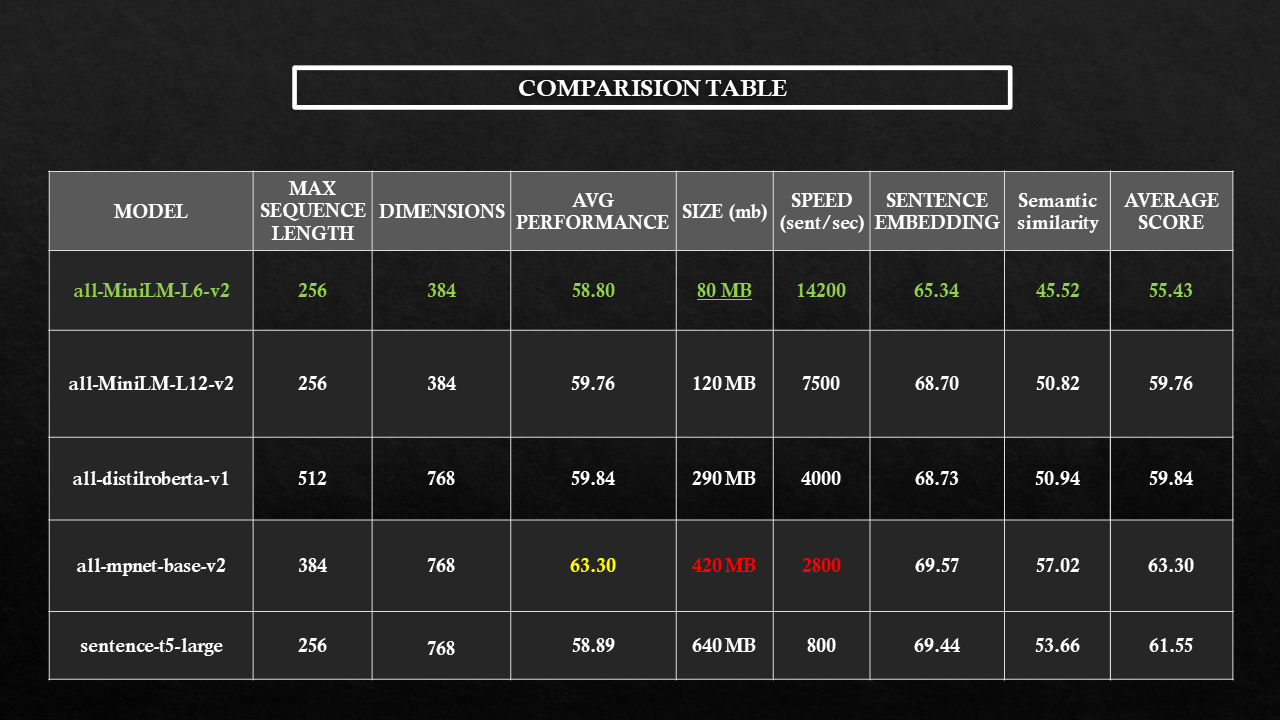